<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/seoul_bike_trip_predictionPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEOUL BIKE TRIP DURATION PREDICTION

Necesitamos predecir la duración del viaje a partir de todos los demás datos del conjunto de datos, como la distancia, la ubicación y la información meteorológica.
La duración del viaje es la medida más fundamental en todos los modos de transporte. Por lo tanto, el desafío es predecir el tiempo de viaje con precisión para el avance de los sistemas de transporte inteligente (ITS) y los sistemas de información al viajero.


# Sobre el dataset
Dataset contains 1 file for_modeling.csv ( 9601139 , 26 )

# Columnas en el dataset
Unnamed: 0

Duration 

Distance

PLong

PLatd

DLong

DLatd

Haversine

Pmonth

Pday

Phour

Pmin

PDweek

Dmonth

Dday

Dhour

Dmin

DDweek

Temp

Precip

Wind

Humid

Solar

Snow

GroundTemp

Dust

### Importar librerias


In [ ]:
#DataFrame y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Entrenamiento y testeo
from sklearn.model_selection import train_test_split

#Metricas y preprocesamiento
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Optimizador Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Warnings
import warnings

### Importar dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/Assigment/Project2/Seoul Bike/For_modeling.csv'

df = pd.read_csv(filename)
df.head(5)

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


# Identificar el numero de features


# Conocer todos los nombres de las columnas

In [ ]:
# Revisar todas las columnas del dataset
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

# Eliminar columnas irrelevantes desde el dataset

In [ ]:
# Eliminación de columna irrelevante Unnamed: 0
df.drop(columns = 'Unnamed: 0', inplace= True)
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

# Análisis , información tipo de columnas

In [ ]:
# Revisar que columnas son categoricas, numéricas o booleanas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


** Después de verificar los Dtypes de todas las columnas **

Features:


** objeto: valores de cadena **

** float64 - Valores numéricos **

** Observación: No hay valores de cadena, por lo que no hay datos categóricos **

# Conocoer más relaciones matemáticas 

In [ ]:
# Para obtener más información sobre el conjunto de datos, como el recuento total en todas las columnas
# valores mínimos, máximos y más información de las respectivas columnas
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


# Obtenga el número total de muestras usando la función len ()

In [ ]:
# comprobar la longitud del conjunto de datos

print('df length:', len(df))

df length: 9601139


#Valores únicos

In [ ]:
# revisar valores únicos dataset
for x in df.columns:
  print(x, ';', len(df[x].unique()))

Duration ; 119
Distance ; 3385
PLong ; 1497
PLatd ; 1504
DLong ; 1501
DLatd ; 1508
Haversine ; 238583
Pmonth ; 12
Pday ; 31
Phour ; 24
Pmin ; 60
PDweek ; 7
Dmonth ; 12
Dday ; 31
Dhour ; 24
Dmin ; 60
DDweek ; 7
Temp ; 547
Precip ; 60
Wind ; 65
Humid ; 89
Solar ; 345
Snow ; 42
GroundTemp ; 700
Dust ; 163


# Contar valores nulos en todas las columnas

In [ ]:
# Verifique los valores faltantes en todas las columnas del conjunto de datos
df.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

No faltan valores en este conjunto de datos

#EDA

# CORRELATION MATRIX


Por qué ?

**Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre variables.
Hay tres razones generales para calcular una matriz de correlación:**



Resumir una gran cantidad de datos donde el objetivo es ver patrones. En nuestro ejemplo anterior, el patrón observable es que todas las variables están altamente correlacionadas entre sí.

Para ingresar en otros análisis. Por ejemplo, las personas suelen utilizar matrices de correlación como entradas para el análisis factorial exploratorio, el análisis factorial confirmatorio, los modelos de ecuaciones estructurales y la regresión lineal cuando se excluyen los valores perdidos por pares.

Como diagnóstico al comprobar otros análisis. Por ejemplo, con la regresión lineal, una gran cantidad de correlaciones sugiere que las estimaciones de la regresión lineal no serán confiables.


In [ ]:
#correlation matrix Using pandas
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Duration,1.00,0.74,-0.05,-0.00,-0.04,-0.00,0.35,-0.05,-0.01,0.13,-0.00,0.08,-0.05,-0.01,0.14,-0.01,0.08,0.13,-0.01,0.07,-0.10,0.07,-0.02,0.12,-0.02
Distance,0.74,1.00,-0.05,-0.01,-0.04,-0.01,0.58,-0.04,-0.01,0.10,-0.01,0.05,-0.04,-0.01,0.10,-0.01,0.05,0.10,-0.01,0.03,-0.03,-0.00,-0.02,0.07,-0.04
PLong,-0.05,-0.05,1.00,0.13,0.93,0.13,-0.04,-0.01,0.00,-0.01,0.00,0.00,-0.01,0.00,-0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00
PLatd,-0.00,-0.01,0.13,1.00,0.13,0.96,0.01,0.02,0.00,0.00,0.00,0.01,0.02,0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
DLong,-0.04,-0.04,0.93,0.13,1.00,0.13,-0.02,-0.01,0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
DLatd,-0.00,-0.01,0.13,0.96,0.13,1.00,0.01,0.02,0.00,0.01,0.00,0.01,0.02,0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
Haversine,0.35,0.58,-0.04,0.01,-0.02,0.01,1.00,-0.03,-0.00,0.01,-0.02,-0.00,-0.03,-0.00,0.02,0.00,-0.00,0.03,-0.01,0.00,0.01,-0.04,-0.01,0.00,-0.02
Pmonth,-0.05,-0.04,-0.01,0.02,-0.01,0.02,-0.03,1.00,-0.07,-0.02,-0.00,-0.01,1.00,-0.07,-0.02,0.00,-0.01,-0.11,-0.00,-0.18,0.02,-0.14,-0.01,-0.14,-0.08
Pday,-0.01,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.07,1.00,-0.01,0.00,0.01,-0.07,1.00,-0.01,0.00,0.01,-0.03,0.01,-0.02,-0.04,-0.00,0.05,-0.02,0.08
Phour,0.13,0.10,-0.01,0.00,-0.01,0.01,0.01,-0.02,-0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.89,-0.02,-0.01,0.17,-0.01,0.23,-0.20,-0.08,-0.02,0.09,-0.03


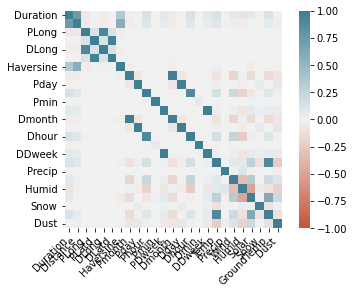

In [ ]:
# Matriz de correlación usando Seaborn
ax = sns.heatmap(corr, vmin= -1, vmax=1, center=0, cmap = sns.diverging_palette(20, 220, n=200), square = True)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right'
    );


**Observación desde arriba correlación mattix**
1. la distancia y la duración están fuertemente relacionadas
Haversine y duración y correlacionados entre sí.
2. la temperatura del suelo y la radiación solar están correlacionadas
3. la temperatura y las radiaciones solares están correlacionadas
phour y dhour no están relacionados con la humedad

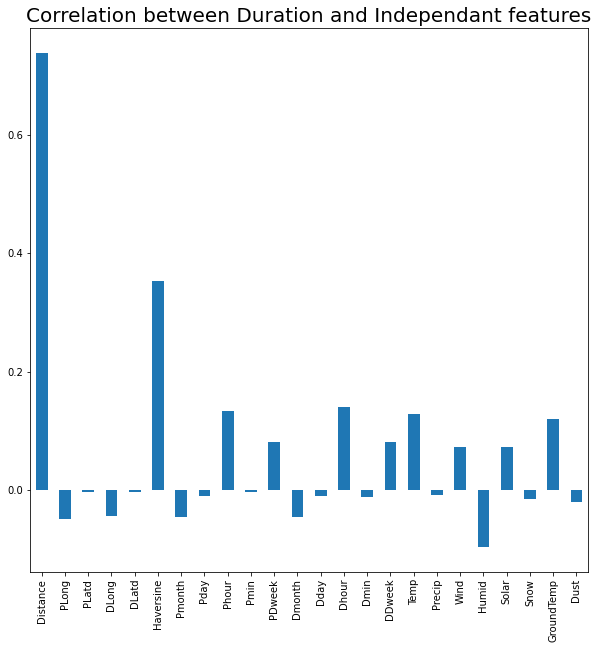

In [ ]:
d = df.drop(['Duration'], axis=1)
d.corrwith(df['Duration']).plot(kind='bar', figsize=(10,10))
plt.title('Correlation between Duration and Independant features', size=20)
plt.show()

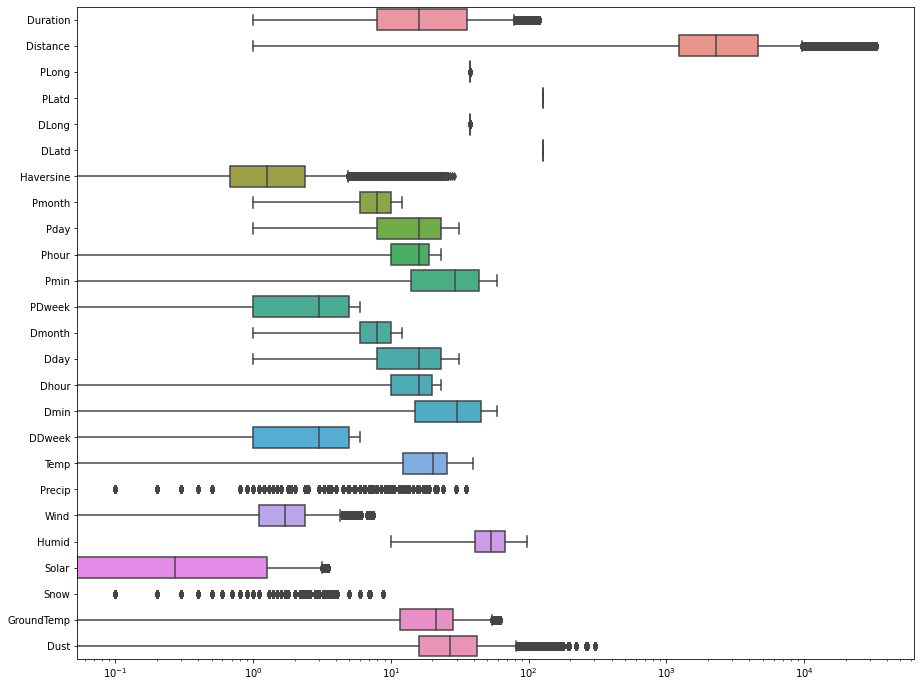

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df, orient='h');
plt.xscale('log')

# HISTOGRAMA

1. Un histograma es una representación aproximada de la distribución de datos numéricos.

2. Para construir un histograma, el primer paso es "agrupar" (o "cubo") el rango de valores, es decir, dividir todo el rango de valores en una serie de intervalos, y luego contar cuántos valores caen en cada intervalo.

3. Las palabras utilizadas para describir los patrones en un histograma son: "simétrico", "sesgado a la izquierda" o "derecha", "unimodal", "bimodal" o "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff41101f390>,
      dtype=object)

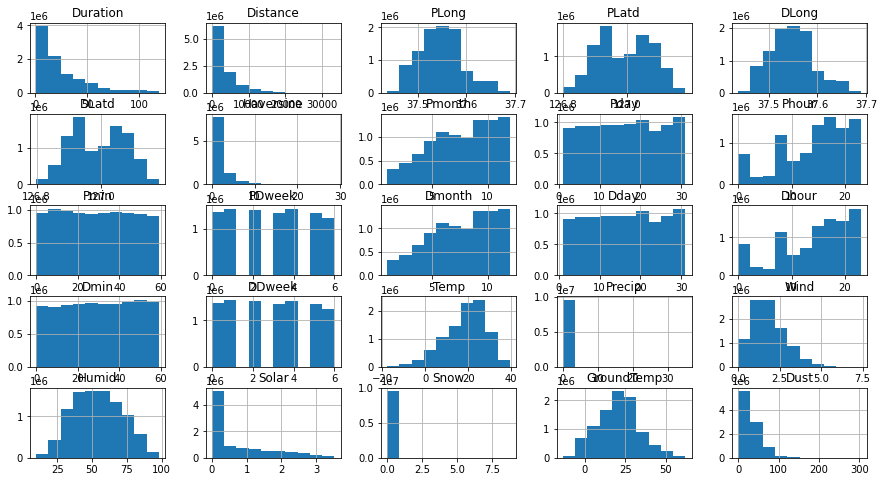

In [ ]:
#Histograma usando pandas
df.hist(figsize = (15,8))

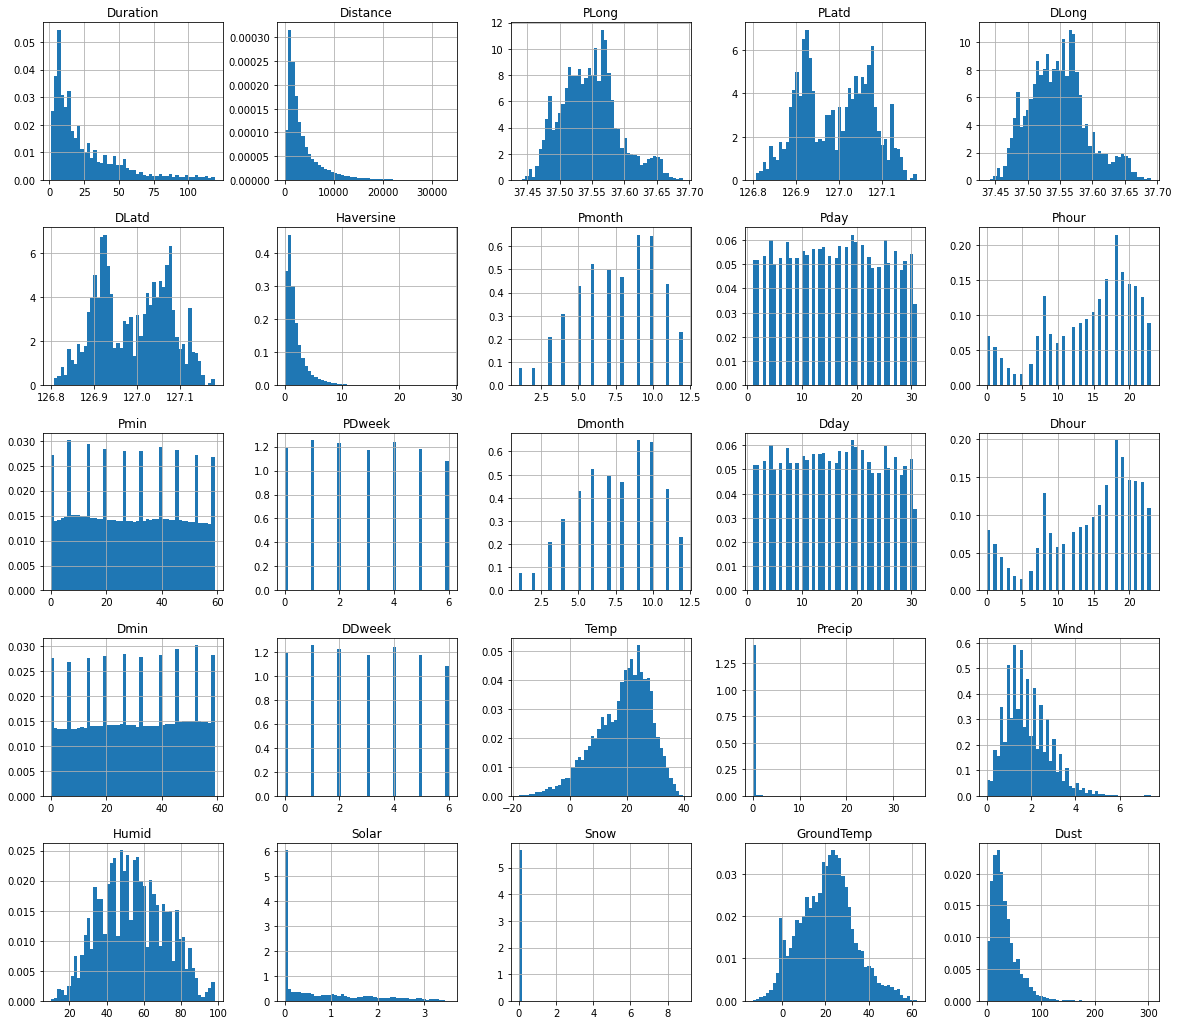

In [ ]:
df.hist(bins=50,figsize=(20,18),density=True)
plt.show()


Observación -
1. La distribución de datos de duración, distancia, haversina, precipitación, radiación solar, nieve y polvo están sesgadas a la izquierda.
2. La distribución de datos de la humedad es simétrica
3. La distribución de datos de Pmin y Dmin está sesgada a la derecha.
4. La distribución de datos de Phour y Dhour es la misma.
5. La distribución de datos de pday y Dday es la misma.
6. La distribución de datos de Pmonth y Dmonth es la misma

# box plot

Un diagrama de caja es una forma estandarizada de mostrar el conjunto de datos basado en un resumen de cinco números:

     1. Mínimo (Q0 o percentil 0): el punto de datos más bajo excluyendo cualquier valor atípico.

     2. Máximo (Q4 o percentil 100): el punto de datos más grande excluyendo cualquier valor atípico.

     3. Mediana (Q2 o percentil 50): el valor medio del conjunto de datos.

     4. Primer cuartil (Q1 o percentil 25): también conocido como el cuartil inferior qn (0,25), es la mediana de la mitad inferior del conjunto de datos.

     5. Tercer cuartil (Q3 o percentil 75): también conocido como el cuartil superior qn (0,75), es la mediana de la mitad superior del conjunto de datos.

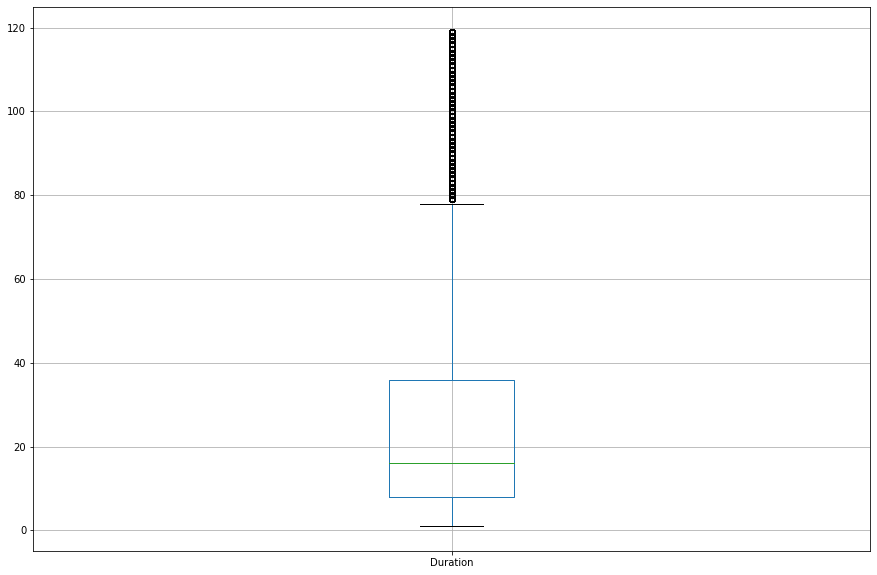

In [ ]:
# Performance de un boxplot sobre Duration column of the dataset
df.boxplot(column = 'Duration', figsize = (15,10))
plt.show()

from above box plot graph:

duration

25% of duration have value between range 0 to 8

25% of duration have value between range 8 to 18

25% of duration have value between range 18 to 35

25% of duration have value between range 35 to 77

The mean duration is around 18

**Mostly the duration are on the lower side of the spectrum. Means small duration trips are the common trips**


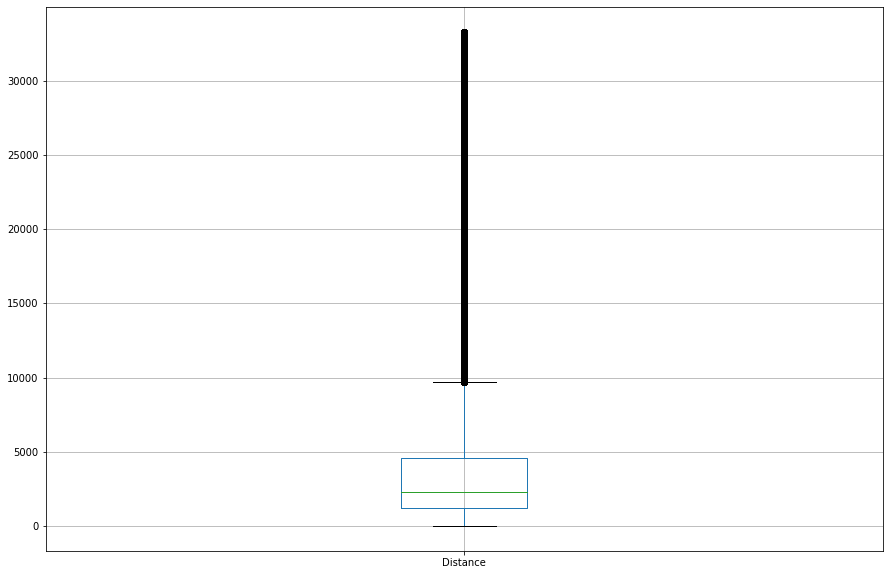

In [ ]:
# Perform boxplot on Distance column of the dataset
df.boxplot(column = 'Distance', figsize = (15,10))
plt.show()

from above box plot graph:

distance

25% of distance have value between range 0 to 1000

25% of distance have value between range 1000 to 2500

25% of distance have value between range 2500 to 4900

25% of distance have value between range 4900 to 9900

The mean distance is around 2500

 Mostly the distance are on the lower side of the spectrum. Means small distance trips are the common trips



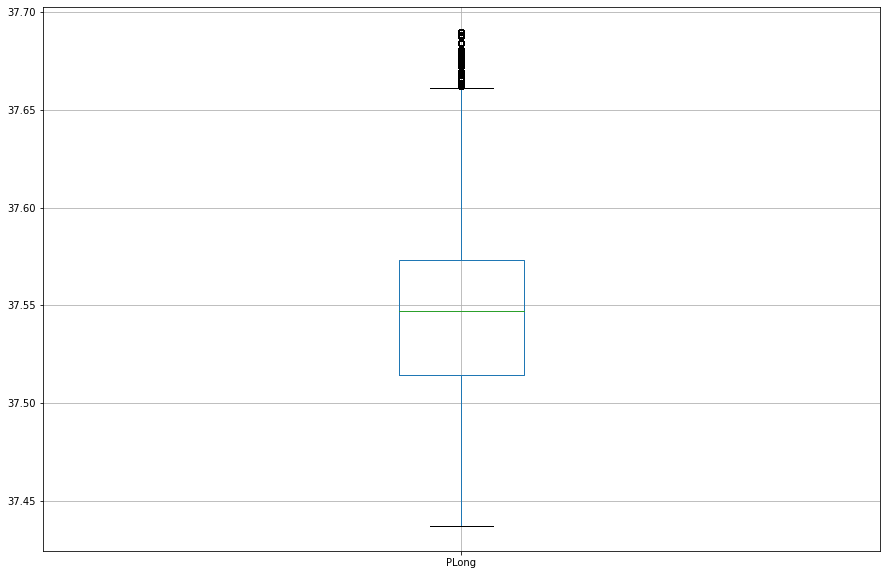

In [ ]:
# Perform boxplot on PLong column of the dataset
df.boxplot(column = 'PLong', figsize = (15,10))
plt.show()

from above box plot graph:

PLong

25% of PLong have value between range 37.44 to 37.52

25% of PLong have value between range 37.52 to 37.559

25% of PLong have value between range 37.559 to 37.58

25% of PLong have value between range 37.58 to 37.66

The mean PLong is around 37.559

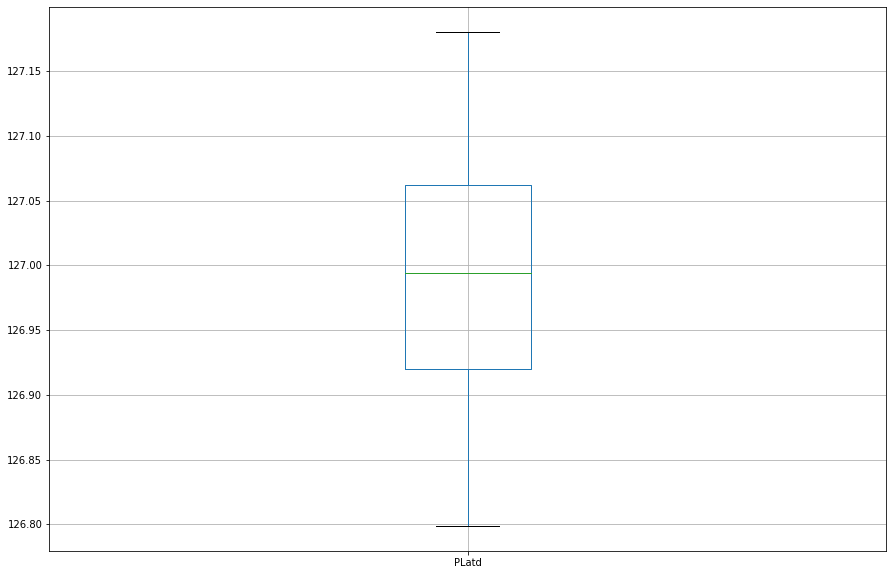

In [ ]:
# Perform boxplot on PLatd column of the dataset
df.boxplot(column = 'PLatd', figsize = (15,10))
plt.show()

from above box plot graph:

PLatd

25% of PLatd have value between range 126.80 to 162.92

25% of PLatd have value between range 126.92 to 126.99

25% of PLatd have value between range 126.99 to 127.07

25% of PLatd have value between range 127.07 to 127.18

The mean PLatd is around 126.99

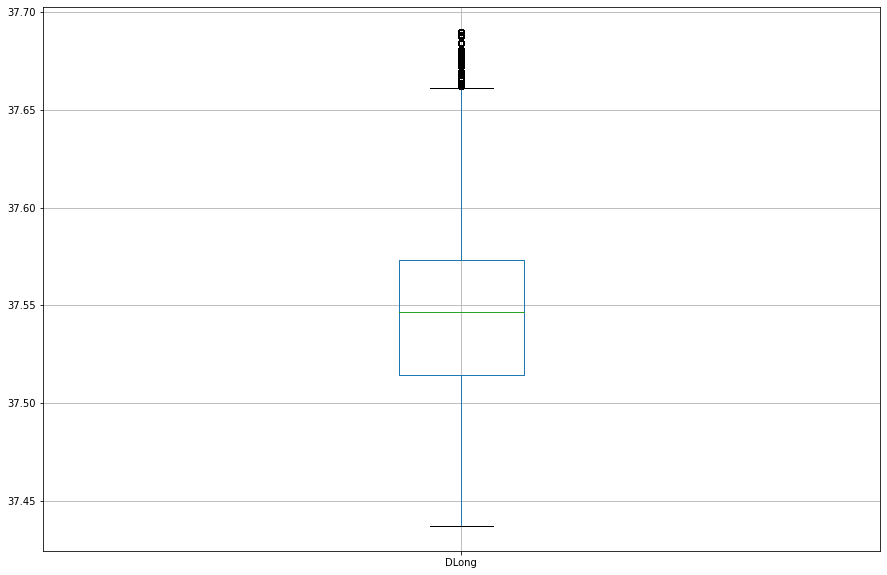

In [ ]:
# Perform boxplot on Dlong column of the dataset
df.boxplot(column = 'DLong', figsize = (15,10))
plt.show()

from above box plot graph:

DLong

25% of DLong have value between range 37.43 to 37.52

25% of DLong have value between range 37.52 to 37.545

25% of DLong have value between range 37.545 to 37.575

25% of DLong have value between range 37.575 to 37.665

The mean DLong is around 37.545

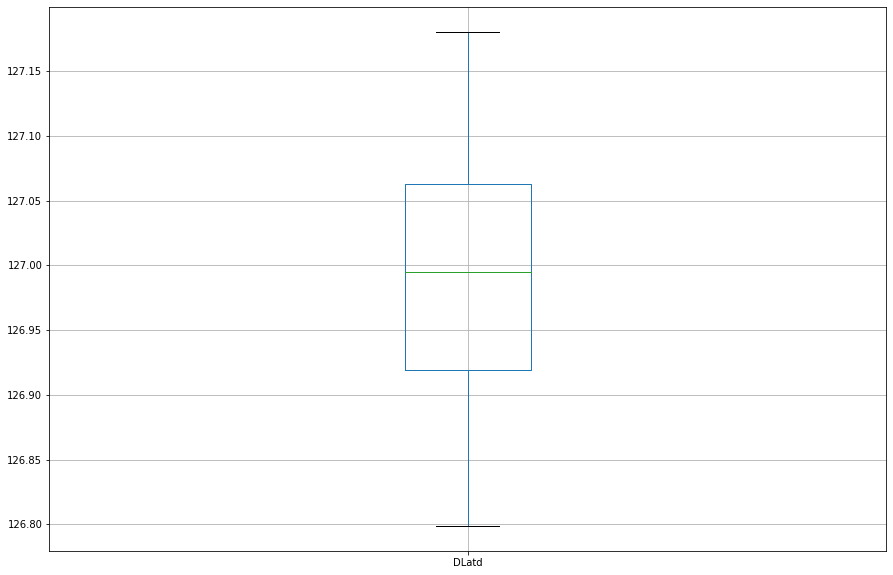

In [ ]:
# Perform boxplot on DLatd column of the dataset
df.boxplot(column = 'DLatd', figsize = (15,10))
plt.show()

from above box plot graph:

DLatd

25% of DLatd have value between range 126.80 to 126.92

25% of DLatd have value between range 126.92 to 126.995

25% of DLatd have value between range 126.995 to 127.055

25% of DLatd have value between range 127.055 to 127.175

The mean DLatd is around 126.995

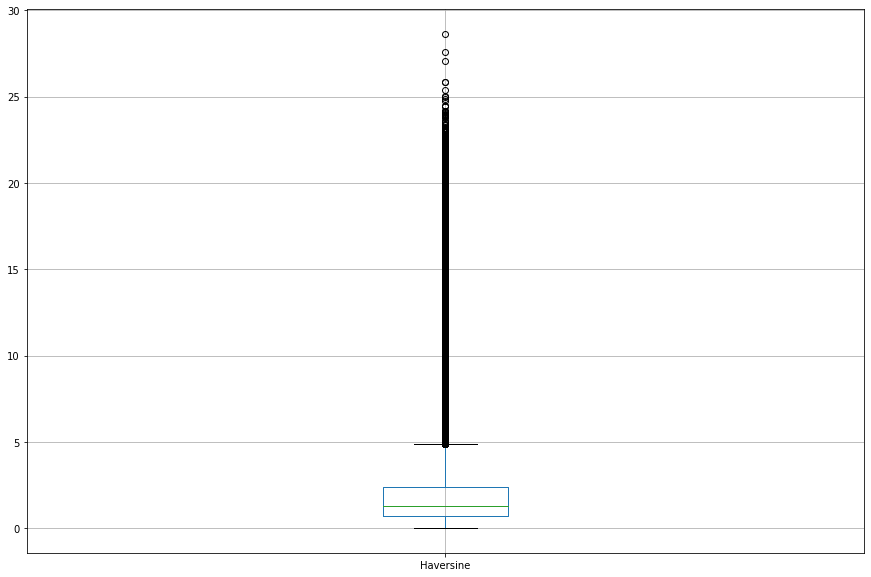

In [ ]:
# Perform boxplot on Haversine column of the dataset
df.boxplot(column = 'Haversine', figsize = (15,10))
plt.show()

from above box plot graph:

haversine

25% of haversine have value between range 0 to 0.25

25% of haversine have value between range 0.25 to 1

25% of haversine have value between range 1 to 2.5

25% of haversine have value between range 2.5 to 5

The mean haversine is around 1

Observation: Mostly the haversine are on the lower side of the spectrum. Means small distance trips are the common trips

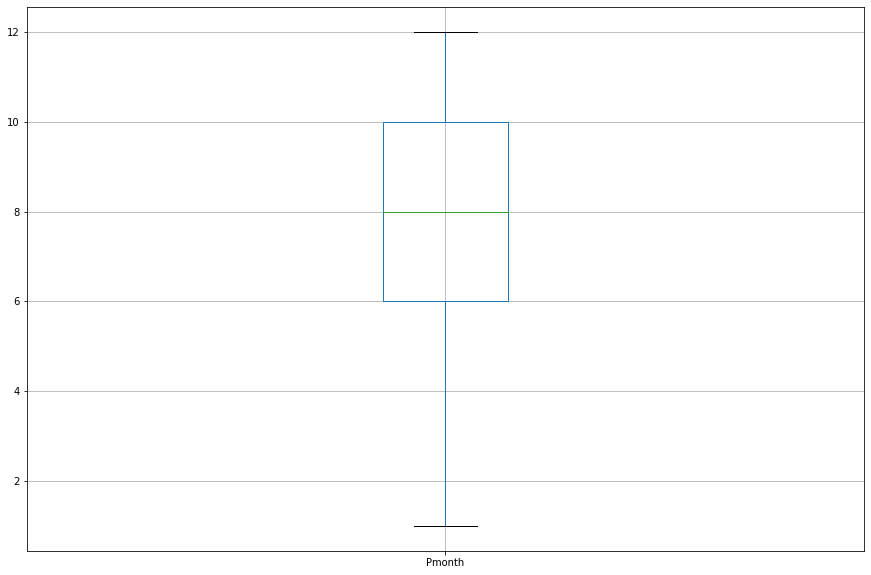

In [ ]:
# Perform boxplot on pmonth column of the dataset
df.boxplot(column = 'Pmonth', figsize = (15,10))
plt.show()

from above box plot graph:

Pmonth

25% of Pmonth have value between range 1 to 6

25% of Pmonth have value between range 6 to 8

25% of Pmonth have value between range 8 to 10

25% of Pmonth have value between range 10 to 12

The mean Pmonth is around 8

more pickups are in the month which are at the end of the year

# POINT PLOT


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

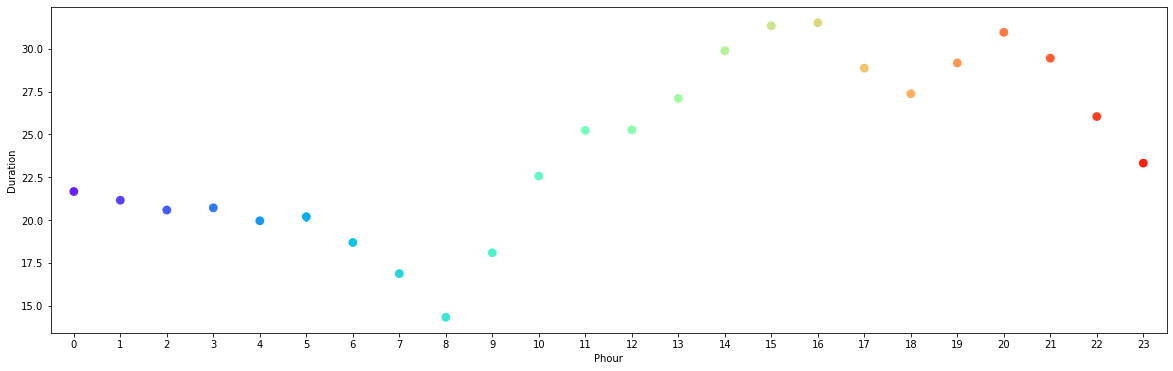

In [ ]:
# Perform point plot between Phour and Duration values 
plt.figure(figsize= (20,6))
sns.pointplot(x = 'Phour', y = 'Duration', data = df, palette = 'rainbow')
plt.show()

duration is more during morning and evening

after 8 duration is increasing and after 20 its again decreasing

# boxen plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

In [ ]:
# Perform boxen plot between distance and Duration 



### DENDOGRAM

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [ ]:
# Plot a Dendrogram on the columns of the dataset




Observación: Todos los conectados están relacionados entre sí de forma compuesta, como latitudes a longitudes, distancia a duración y muchos más.

# violin plot

1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# Perform violin plot between distance and Duration 


Distance and duration arecorrelated

as duration increases distance also increases

# Modelo

In [ ]:
#Seleccionamos una submuestra , dado que son 9 millones de filas

In [ ]:
import random

In [ ]:
df = df.sample(n=500, random_state=3)
df.shape

(500, 25)

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
2779456,36,5080,37.488243,127.027016,37.506199,127.003944,2.851213,6,12,22,42,1,6,12,23,19,1,20.0,0.0,1.0,70.0,0.00,0.0,18.6,10.0
5592934,10,1110,37.585629,127.000679,37.590233,126.998520,0.546145,9,4,19,47,1,9,4,19,57,1,25.1,0.0,3.1,49.0,0.18,0.0,22.9,16.0
7228637,33,6100,37.602627,127.041634,37.602627,127.041634,0.000000,10,9,16,25,1,10,9,16,30,1,19.0,0.0,1.4,39.0,0.89,0.0,19.6,28.0
3314874,13,1330,37.558197,126.844261,37.552914,126.836571,0.897004,6,27,18,9,2,6,27,18,23,2,25.0,0.0,1.5,69.0,0.52,0.0,25.9,35.0
784074,13,2660,37.548561,127.045006,37.567970,127.046890,2.164565,4,2,8,20,0,4,2,8,34,0,15.7,0.0,1.1,75.0,0.11,0.0,13.9,65.0


In [ ]:
# Splitting data into Labels and target
df.shape  

(500, 25)

In [ ]:
# Processing the whole dataframe
X = df.drop(columns = ['Duration'])

y = df[['Duration']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y.shape

(500, 1)

In [ ]:
# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Check the shape of all the splitted dataset
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((375, 24), (125, 24), (375, 1), (125, 1))

In [ ]:
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)

In [ ]:

X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [ ]:
# importing necessary libraries for geting metrics of models
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
# Function for calculating RMSE 

def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

# Funcion para calcular todas las metricas relevantes

 
def print_score(m):
  res = [rmse(m.predict(X_train),y_train),rmse(m.predict(X_test), y_test),
         m.score(X_train, y_train), m.score(X_test, y_test),
         mean_squared_error(m.predict(X_train), y_train), mean_squared_error(m.predict(X_test), y_test),
         metrics.median_absolute_error(m.predict(X_train), y_train), metrics.median_absolute_error(m.predict(X_test), y_test),] 


  print('RMSE-train: ' + str(res[0])+ '\nRMSE-test: ' + str(res[1])+ 
      '\nScore-Train: ' + str(res[2]) + '\nScore-Test: ' + str(res[3])+
      '\nMSE-Train: ' + str(res[4]) + '\nMSE-Test: ' + str(res[5])+
      '\nMAE-Train: ' + str(res[6]) + '\nMAE-Test: '+ str(res[7]))
  


## Linear Regression

La regresión lineal intenta modelar la relación entre dos variables ajustando una ecuación lineal a los datos observados. Una variable se considera una variable explicativa y la otra una variable dependiente.

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset
# Import LinearRegressor
from sklearn.linear_model import LinearRegression # Instantiate the model
lModel = LinearRegression() # Fit the model to the data
lModel.fit(X_train,y_train)


CPU times: user 8.32 ms, sys: 12 ms, total: 20.3 ms
Wall time: 21.4 ms


In [ ]:
print_score(lModel)

RMSE-train: 0.19780156332432627
RMSE-test: 0.09038185875792086
Score-Train: 0.9608745415464526
Score-Test: 0.9943172031257631
MSE-Train: 0.03912545845354746
MSE-Test: 0.008168880392536756
MAE-Train: 0.038363321606006306
MAE-Test: 0.03901728780968039


## Random Forest Regressor

El bosque aleatorio es un algoritmo de aprendizaje automático flexible y fácil de usar que produce, incluso sin ajuste de hiperparámetros, un gran resultado la mayor parte del tiempo. También es uno de los algoritmos más utilizados, por su sencillez y diversidad.

In [ ]:

# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
rf = RandomForestRegressor() # Fit the model to the data
rf.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# print score of the model
print_score(rf)

RMSE-train: 1.3664174000331382
RMSE-test: 1.4896706100918709
Score-Train: 0.9672336725448872
Score-Test: 0.5525154659759639
MSE-Train: 0.03276632745511273
MSE-Test: 0.6432479845486686
MAE-Train: 0.060187023048965616
MAE-Test: 0.1990470833690801


## KNeighbors Regressor

La regresión KNN es un método no paramétrico que, de manera intuitiva, aproxima la asociación entre las variables independientes y el resultado continuo promediando las observaciones en el mismo vecindario. El analista debe establecer el tamaño del vecindario o puede elegirse mediante validación cruzada para seleccionar el tamaño que minimice el error cuadrático medio.

In [ ]:
# Fit a K-Neighbour Regressor model to the train dataset # Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor # Instantiate the model
knnr = KNeighborsRegressor()
# Fit the model to the data
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# print score of the model
print_score(knnr)

RMSE-train: 0.7101069349185622
RMSE-test: 1.1369009738429416
Score-Train: 0.49574814098056463
Score-Test: 0.10082365615252131
MSE-Train: 0.5042518590194353
MSE-Test: 1.292543824325029
MAE-Train: 0.3095332613946814
MAE-Test: 0.3525239921439427


## Gradient Boosting Regressor

El algoritmo de aumento de gradiente se usa generalmente cuando queremos disminuir el error de sesgo. construye un modelo aditivo de manera progresiva por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. En cada etapa se ajusta un árbol de regresión sobre el gradiente negativo de la función de pérdida dada.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # Instantiate the model
GBR = GradientBoostingRegressor() # Fit the model to the data
GBR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# print score of the model
print_score(GBR)

RMSE-train: 1.3643409462761262
RMSE-test: 1.520287775780827
Score-Train: 0.9625286324309696
Score-Test: 0.5308411250592358
MSE-Train: 0.03747136756903034
MSE-Test: 0.6744043152171988
MAE-Train: 0.08359581075196898
MAE-Test: 0.18894335110879168


## Decision Tree Regressor

El árbol de decisiones crea modelos de regresión o clasificación en forma de estructura de árbol. Divide un conjunto de datos en subconjuntos cada vez más pequeños mientras que, al mismo tiempo, se desarrolla de forma incremental un árbol de decisiones asociado. El resultado final es un árbol con nodos de decisión y nodos de hoja.

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Instantiate the model
DTR = DecisionTreeRegressor() # Fit the model to the data
DTR.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# print score of the model
print_score(GBR)

RMSE-train: 1.3643409462761262
RMSE-test: 1.520287775780827
Score-Train: 0.9625286324309696
Score-Test: 0.5308411250592358
MSE-Train: 0.03747136756903034
MSE-Test: 0.6744043152171988
MAE-Train: 0.08359581075196898
MAE-Test: 0.18894335110879168


## AdaBoostRegressor

Un regresor AdaBoost es un metaestimador que comienza ajustando un regresor en el conjunto de datos original y luego ajusta copias adicionales del regresor en el mismo conjunto de datos, pero donde los pesos de las instancias se ajustan según el error de la predicción actual.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor # Instantiate the model
AdaBoost = AdaBoostRegressor() # Fit the model to the data
AdaBoost.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
# print score of the model
print_score(AdaBoost)

RMSE-train: 1.2676032751640358
RMSE-test: 1.3788810086701253
Score-Train: 0.7447522365442235
Score-Test: 0.5324183367806166
MSE-Train: 0.25524776345577643
MSE-Test: 0.6721371122552072
MAE-Train: 0.44372575666201847
MAE-Test: 0.5005349365806854


## XGB Regressor

XGBoost es un método de aprendizaje conjunto. A veces, puede que no sea suficiente confiar en los resultados de un solo modelo de aprendizaje automático. El aprendizaje conjunto ofrece una solución sistemática para combinar el poder predictivo de múltiples alumnos. El resultado es un modelo único que da la salida agregada de varios modelos.

In [ ]:
from xgboost import XGBRegressor # Instantiate the model
xgbr = XGBRegressor()
# Fit the model to the data
xgbr.fit(X_train,y_train)

[19:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# print score of the model
print_score(xgbr)

RMSE-train: 1.362696759876335
RMSE-test: 1.5041756380772422
Score-Train: 0.9559799652353096
Score-Test: 0.5431541350209825
MSE-Train: 0.04402003476469039
MSE-Test: 0.6567046669848963
MAE-Train: 0.08560044345271219
MAE-Test: 0.19938782514833442


## Light Gradient Boosted Machine

In [ ]:
%%time
# import LGBMregressor
import lightgbm as lgbm # Instantiate the model
lg = lgbm.LGBMRegressor()
# Fit the model to the data
lg.fit(X_train, y_train)

CPU times: user 68.9 ms, sys: 5.9 ms, total: 74.8 ms
Wall time: 79.8 ms


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# print score of the model
print_score(lg)

RMSE-train: 1.3585589687373252
RMSE-test: 1.5083290124168687
Score-Train: 0.9625698644099655
Score-Test: 0.4655901660536293
MSE-Train: 0.03743013559003446
MSE-Test: 0.7682009599699974
MAE-Train: 0.055097181320102495
MAE-Test: 0.23134478219941268
